In [2]:

!pip install numpy
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
# Use pandas web datareader to pull financial information
import pandas_datareader as web
import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.1 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
# Import stock data from Yahoo Finance API
user_input = input('Please enter a stock ticker: ')
stock_data= web.DataReader(user_input,data_source="yahoo",start='2015-01-01',end='2021-09-30')
stock_data.head()

Please enter a stock ticker: MSFT


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,40.811428
2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,40.436138
2015-01-06,46.750000,45.540001,46.380001,45.650002,36447900.0,39.842651
2015-01-07,46.459999,45.490002,45.980000,46.230000,29114100.0,40.348858
2015-01-08,47.750000,46.720001,46.750000,47.590000,29645200.0,41.535851


In [4]:
stock_data.shape

(1699, 6)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'Closing Price History')

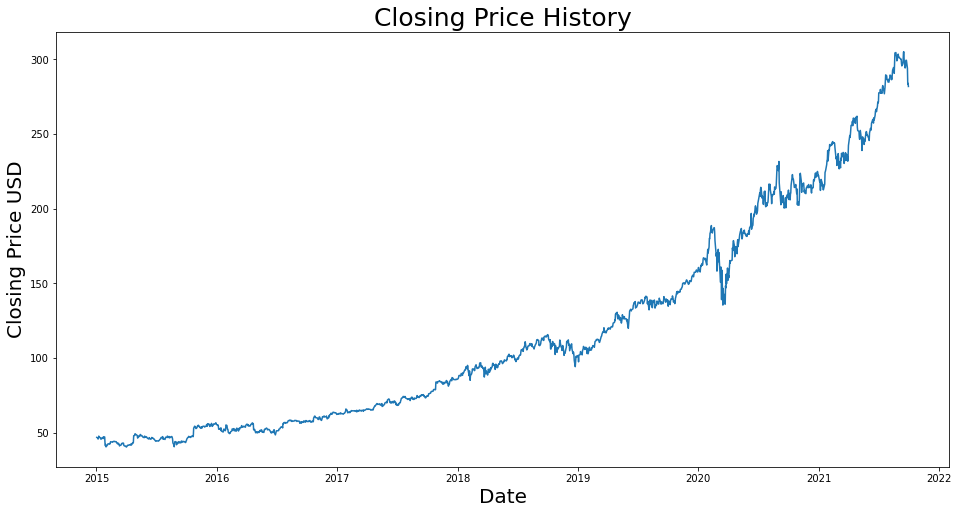

In [5]:
#Pull the closing price in stock's history
!pip install matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(16,8))
sns.lineplot(x= stock_data.index,y=stock_data['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Closing Price USD',fontsize=20)
plt.title('Closing Price History',fontsize=25)

In [6]:
# Split into train and test dataset
data_to_train = stock_data[:1530]
data_to_test = stock_data[1530:]

In [7]:
# Save a training dataset and testing dataset
data_to_train.to_csv('train_data.csv')
data_to_test.to_csv('test_data.csv')

In [8]:
user_data= stock_data.iloc[: , 3:4]
user_data.head()

,Close
Date,
2015-01-02,46.759998
2015-01-05,46.330002
2015-01-06,45.650002
2015-01-07,46.230000
2015-01-08,47.590000


In [9]:
# Create NumPy array
training_dataset= user_data.iloc[:1530,:].values

In [10]:
testing_dataset= user_data.iloc[1530:,:].values

In [11]:
# Normalizae the training dataset
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
scaled_training_dataset = sc.fit_transform(training_dataset)

In [12]:
# Create data structure with 60 timesteps and 1 output
X_train= [] # Independent variable
y_train= [] # Dependent ''  
# Append past 60 days data 
for i in range(60,1530):
    X_train.append(scaled_training_dataset[i-60:i,0]) # Append previous 60 days, not including 60 (i - 60)
    y_train.append(scaled_training_dataset[i,0])
    
X_train, y_train= np.array(X_train), np.array(y_train)

In [13]:
X_train.shape, y_train.shape

((1470, 60), (1470,))

In [14]:
# Reshape the LSMT model to be 3-D
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1470, 60, 1)

In [40]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#  Initialize the RNN
model= Sequential()

# Add the first LSTM layer and some dropout regularisation
model.add(LSTM(units=100,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(rate=0.4))

# Second ''
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.4))

# Third ''
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.4))

# Fourth '' 
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.4))

# Fifth ''
model.add(LSTM(units=100))
model.add(Dropout(rate=0.4))

# Add the Output Layer
model.add(Dense(units=1))

# Compiling the Model (regression)
model.compile(loss='mean_squared_error', optimizer='adam')

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 100)           40800     
                                                                 
 dropout_10 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_11 (LSTM)              (None, 60, 100)           80400     
                                                                 
 dropout_11 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_12 (LSTM)              (None, 60, 100)           80400     
                                                                 
 dropout_12 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_13 (LSTM)              (None, 60, 100)          

In [42]:
# Fitting our model to the Training dataset
history=model.fit(X_train,y_train,epochs=35,batch_size=32)

Epoch 1/35
46/46 [==============================] - 24s 303ms/step - loss: 0.0144
Epoch 2/35
46/46 [==============================] - 13s 280ms/step - loss: 0.0042
Epoch 3/35
46/46 [==============================] - 13s 279ms/step - loss: 0.0038
Epoch 4/35
46/46 [==============================] - 13s 279ms/step - loss: 0.0039
Epoch 5/35
46/46 [==============================] - 13s 283ms/step - loss: 0.0038
Epoch 6/35
46/46 [==============================] - 14s 300ms/step - loss: 0.0037
Epoch 7/35
46/46 [==============================] - 13s 281ms/step - loss: 0.0036
Epoch 8/35
46/46 [==============================] - 13s 282ms/step - loss: 0.0027
Epoch 9/35
46/46 [==============================] - 13s 281ms/step - loss: 0.0029
Epoch 10/35
46/46 [==============================] - 13s 280ms/step - loss: 0.0034
Epoch 11/35
46/46 [==============================] - 13s 283ms/step - loss: 0.0037
Epoch 12/35
46/46 [==============================] - 13s 282ms/step - loss: 0.0028
Epoch 13/35
4

In [43]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [44]:
real_stock_price = test_data.iloc[:, 3:4].values

In [45]:
real_stock_price.shape

(169, 1)

In [46]:
testing_dataset.shape

(169, 1)

In [47]:
# Concatenate the dataset and scale
data_total= pd.concat([train_data['Close'], test_data['Close']],  axis=0)
inputs = data_total[len(data_total)-len(test_data)-60:].values 
inputs = inputs.reshape(-1,1) 
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 230):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
# 3D format
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [48]:
inputs.shape

(229, 1)

In [49]:
data_total.shape

(1699,)

In [50]:
X_test.shape

(170, 60, 1)

In [51]:
# Make prediction from model
predicted_stock_price = model.predict(X_test)

6/6 [==============================] - 4s 75ms/step


In [52]:
# Inverse scaling
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

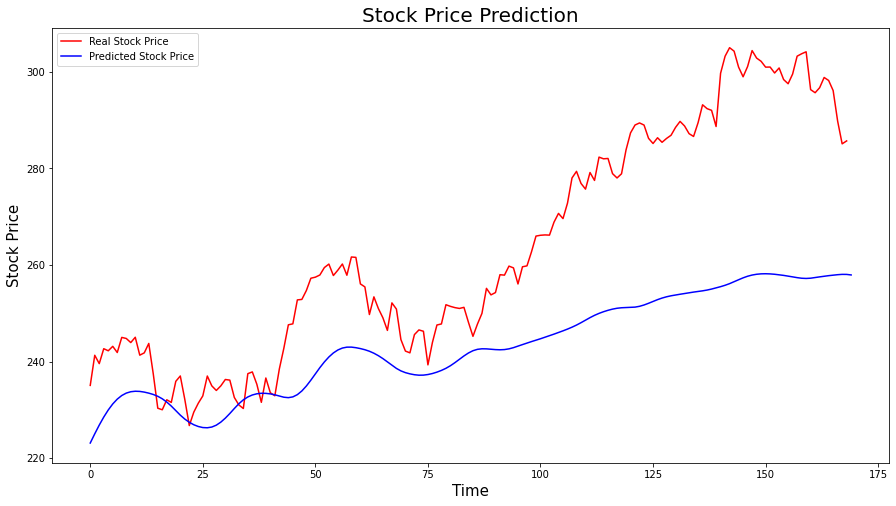

In [53]:
# Plot result
plt.figure(figsize=(15,8))
plt.plot(real_stock_price, color='Red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction',fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Stock Price',fontsize=15)
plt.legend()
plt.show()

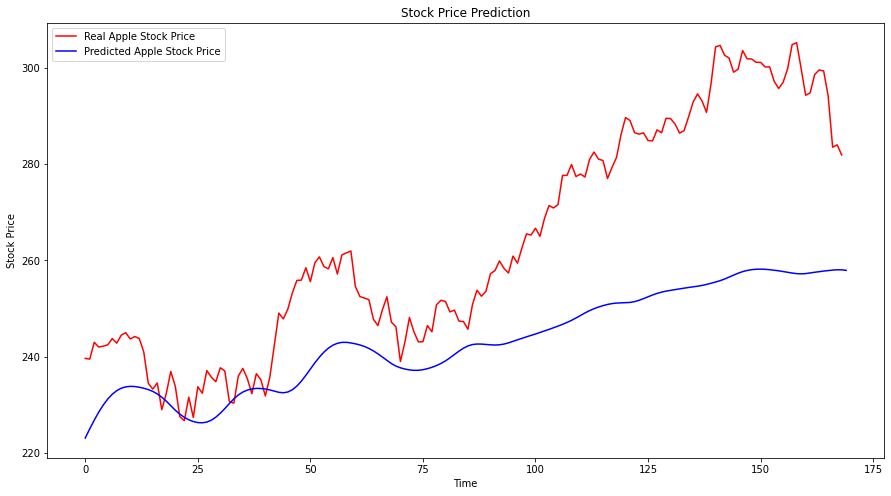

In [54]:
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(testing_dataset, color='Red', label='Real Apple Stock Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted Apple Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [59]:
print("Real Stock Price closing values (by day): ")
print(pd.DataFrame(real_stock_price))
print("Predicted Stock Price closing values (by day): ")
print(pd.DataFrame(predicted_stock_price))

Real Stock Price closing values (by day): 
              0
0    235.059998
1    241.300003
2    239.570007
3    242.660004
4    242.229996
..          ...
164  298.230011
165  296.140015
166  289.799988
167  285.100006
168  285.709991

[169 rows x 1 columns]
Predicted Stock Price closing values (by day): 
              0
0    223.117371
1    225.023666
2    226.833740
3    228.495087
4    229.967285
..          ...
165  257.895416
166  257.991974
167  258.058502
168  258.049316
169  257.937347

[170 rows x 1 columns]
